### Step 1. 키워드 추출

In [1]:
!pip install konlpy 

from konlpy.tag import Hannanum
from collections import Counter

You should consider upgrading via the '/Users/hyunjinlee/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd #sheetname = '시트명 or 숫자' , header = 숫자 skiprow=숫자 
xlsx = pd.read_excel('combined_korean_onlycomment.xlsx') #상위 데이터 확인 
print(xlsx.head()) 
print(xlsx.tail()) 
print(xlsx.shape) #행, 열

                                                text
0                                       3억전세도 세금받야야지
1                       외국인 25%이고 내국인 3억 ㅎ ㅎ ㅎ 형평성 ?
2                         세금한번내본적없는년들이 부자들세금은내는게당연하냐
3  10월12일 월요일 현재 시가총액10조원을 넘어가는 기업수는 33개이고 기제부가 3...
4              공매도 세력이 뭐준다냐? 증권사 거래세 엄청 나긋네 도둑넘 새,키들
                                                    text
14017  담부턴 무슨 사건인지 보조 설명 부탁해~ 그래서 옵티머스가 뭔데? 달에서 옵티머스 ...
14018                                                 1빠
14019                                    어쩐지 좋다고 사면 내리더라
14020                                                1등!
14021                                                1등!
(14022, 1)


In [3]:
print(type(xlsx))

<class 'pandas.core.frame.DataFrame'>


#### 텍스트 데이터 전처리

In [4]:
import re
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [5]:
print(text_cleaning(xlsx['text'][0]))

억전세도 세금받야야지


In [6]:
# 각 피처마다 데이터 전처리를 적용
xlsx['text'] = xlsx['text'].apply(lambda x: text_cleaning(str(x)))
xlsx.head(5)

,text
0,억전세도 세금받야야지
1,외국인 이고 내국인 억 ㅎ ㅎ ㅎ 형평성
2,세금한번내본적없는년들이 부자들세금은내는게당연하냐
3,월일 월요일 현재 시가총액조원을 넘어가는 기업수는 개이고 기제부가 억원이상보유하면 ...
4,공매도 세력이 뭐준다냐 증권사 거래세 엄청 나긋네 도둑넘 새키들


#### 텍스트 말뭉치 만들기

In [7]:
# 각 피처마다 말뭉치를 생성
content_corpus = "".join(xlsx['text'].tolist())
print(content_corpus)

억전세도 세금받야야지외국인 이고 내국인 억 ㅎ ㅎ ㅎ 형평성 세금한번내본적없는년들이 부자들세금은내는게당연하냐월일 월요일 현재 시가총액조원을 넘어가는 기업수는 개이고 기제부가 억원이상보유하면 대주주라고 하는데최저배율이 분의을 보유하면 대주주로 분류가 된다고한국말이 그것도 정부공무원이 행정명령에 사용하는 글이도대체 왜이래공매도 세력이 뭐준다냐 증권사 거래세 엄청 나긋네 도둑넘 새키들미친 진짜적당히 삥뜯어이번 정부 최악이다 진짜 최순실 박근혜가 나은듯차 한대도 요즘 억대인데 누구ㅡ 대갈 통에서 나온 건지반대한다고밀리고반발한다고취소하고참잘한다처음부터좀잘좀하지떠불당찍으신분들 덕분에 신기한거많이보네요 ㅋㅋ주식 하지말라고 왜  억에서 억이지 억이냐고그렇게 서민서민 그러더니 정말 서민만잡네요 ㅡㅡ 이럴려고 투표한거아닌데 상식선에서 정책좀해주세요 제발 에휴대한민국 수준이 딱 조선시대네개같는 정부 절대로 안 찍는다세금 내는걸 당연하듯이 여기는 사상이 너무 뿌리깊게 박혀있다는게 참 개탄스럽다국민에게 만원주며 생색내고 국민을 어떻게 등쳐먹을지 고민만 하는 이번정부 역겹다돌았냐 개미들 세금매길 생각만하네 쓰레기같은놈들 부동산막고 그나마 주식만남았는데 세금 넘게 때가는게 말이되냐 그것도 가족합산으로 공산주의냐민주당이것들 지들 맘대로네거래세를 내잖아 거래세를천만원 이상 양도차익 세금도 하고 이것도 하고 욕심히 너무 지나치네제발 하나만 해라미친ㅎㅎ억 미친다 연말되면 매도폭탄나온다 개미만피해입는다당연한거란다 ㅋㅋ개그하네이건미친짓이네세금 뜯어내는 방법도 다양하네ㅋㅋ 이 도둑넘들은 혜택도 안 주면서 뺐는거는 더럽게 잘해요그 세금 안낼려고 연말에 다 팔아서 기업 자금조달 개폭망하는건데 오건호 병신새낀는 뭐라는겨금융소득과 근로소득의 형평성을 고려한 조치였다 ㅡㅡ면서 가족합산 방식은 완화해 결국 구멍은 또 만들어준거네그러니깐 일하는 척 대책을 세우는 척세금내는게 왜 당연한거임 알 수가 없네 진짜빵 훔친애들 보도할 필요 없고왕건이 꺼내라쓰레기들아수상하다  좌빨놈들  좌빨들이 비트코인 장난질  서민알바

#### konlpy를 이용한 키워드 추출

In [8]:
!pip install konlpy

You should consider upgrading via the '/Users/hyunjinlee/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.


In [9]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [10]:
count

Counter({'세도': 5,
         '세금': 1011,
         '외국인': 42,
         '국': 29,
         '억': 297,
         '형평성': 6,
         '한번': 142,
         '본적': 15,
         '년': 653,
         '부자': 178,
         '월일': 26,
         '월요일': 1,
         '현재': 96,
         '시가총액': 24,
         '조원': 11,
         '기업': 319,
         '수': 341,
         '개': 386,
         '부가': 6,
         '이상보': 1,
         '유하': 2,
         '주주': 85,
         '최저': 23,
         '배율': 1,
         '분': 280,
         '보유': 114,
         '분류': 7,
         '국말이': 1,
         '그것': 84,
         '정부': 382,
         '공무원': 44,
         '행정명령': 1,
         '사용': 46,
         '글': 92,
         '도대체': 44,
         '왜': 794,
         '공매도': 148,
         '세력': 71,
         '뭐': 529,
         '증권사': 34,
         '거래': 140,
         '세': 50,
         '나': 241,
         '도둑': 53,
         '키': 24,
         '진짜': 483,
         '삥': 25,
         '이번': 144,
         '최악': 9,
         '최': 28,
         '실': 9,
         '박근혜': 10,
      

In [11]:
# 세글자 이상 키워드 추출은 오류x
# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'주식': 2942, '사람': 1625, '투자': 1444, '코인': 1241, '세금': 1011, '생각': 774, '지금': 651, '도박': 545, '그냥': 522, '진짜': 483, '공부': 439, '화폐': 430, '아나운서': 425, '부동산': 423, '수익': 388, '투기': 385, '정부': 382, '가치': 381, '뉴스': 359, '소리': 343, '보호': 328, '가상': 324, '힐링': 324, '기업': 319, '삼성': 312, '만원': 300, '개미': 295, '나라': 290, '비트코인': 282, '자산': 281, '하나': 276, '보고': 275, '시작': 273, '정도': 272, '우리': 264, '미국': 261, '도지': 257, '문제': 241, '이상': 239, '사기': 238, '검색': 230, '때문': 223, '종목': 222, '장기': 218, '국민': 216, '자기': 216, '여행자': 216, '회사': 211, '무슨': 210, '시장': 209, '누가': 196, '인정': 196, '정보': 189, '세상': 187, '이해': 187, '본인': 186, '세대': 186, '이제': 182, '말씀': 180, '금리': 179, '부자': 178, '은행': 178, '단타': 177, '전자': 177, '거지': 176, '매수': 176, '선생님': 176, '프로': 174, '경제': 173, '한국': 169, '절대': 168, '오픈': 165, '정말': 164, '그게': 161, '방송': 158, '얘기': 155, '기사': 151, '계속': 150, '공매도': 148, '우리나라': 148, '금융': 146, '이번': 144, '이유': 144, '이자': 144, '요즘': 143, '한번': 142, '댓글': 142, '여기': 142, '가지': 14

*불용어 제거*

In [12]:
# 한국어 약식 불용어사전 예시 파일 (출처 - (https://www.ranks.nl/stopwords/korean))
korean_stopwords_path = "korean_stopwords.txt"

# 텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [13]:
# 유튜브 댓글에 맞는 불용어를 추가
youtube_stopwords = ['등', '1등', '구독', '알고리즘', '그냥','진짜','소리','계속','그게','Counter']
for stopword in youtube_stopwords:
    stopwords.append(stopword)

In [14]:
# 키워드 데이터에서 불용어를 제거
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'주식': 2942, '사람': 1625, '투자': 1444, '코인': 1241, '세금': 1011, '생각': 774, '지금': 651, '도박': 545, '공부': 439, '화폐': 430, '아나운서': 425, '부동산': 423, '수익': 388, '투기': 385, '정부': 382, '가치': 381, '뉴스': 359, '보호': 328, '가상': 324, '힐링': 324, '기업': 319, '삼성': 312, '만원': 300, '개미': 295, '나라': 290, '비트코인': 282, '자산': 281, '보고': 275, '시작': 273, '정도': 272, '미국': 261, '도지': 257, '문제': 241, '사기': 238, '검색': 230, '때문': 223, '종목': 222, '장기': 218, '국민': 216, '여행자': 216, '회사': 211, '시장': 209, '누가': 196, '인정': 196, '정보': 189, '세상': 187, '이해': 187, '본인': 186, '세대': 186, '이제': 182, '말씀': 180, '금리': 179, '부자': 178, '은행': 178, '단타': 177, '거지': 176, '매수': 176, '선생님': 176, '프로': 174, '경제': 173, '한국': 169, '절대': 168, '오픈': 165, '정말': 164, '방송': 158, '얘기': 155, '기사': 151, '공매도': 148, '우리나라': 148, '금융': 146, '이유': 144, '이자': 144, '요즘': 143, '한번': 142, '댓글': 142, '가지': 141, '거래': 140, '자체': 138, '인생': 137, '미래': 137, '집값': 134, '개인': 132, '적금': 131, '거래소': 130, '시대': 130, '나스닥': 128, '기술': 127, '해도': 127, '수준': 

In [15]:
print(remove_char_counter.most_common(15))

[('주식', 2942), ('사람', 1625), ('투자', 1444), ('코인', 1241), ('세금', 1011), ('생각', 774), ('지금', 651), ('도박', 545), ('공부', 439), ('화폐', 430), ('아나운서', 425), ('부동산', 423), ('수익', 388), ('투기', 385), ('정부', 382)]


### Step 2. 워드 클라우드 시각화

In [16]:
pip install pytagcloud pygame simplejson

You should consider upgrading via the '/Users/hyunjinlee/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud

You should consider upgrading via the '/Users/hyunjinlee/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install matplotlib

You should consider upgrading via the '/Users/hyunjinlee/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
from wordcloud import WordCloud

In [23]:
import matplotlib.pyplot as plt

In [51]:
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white',width=800, height=600, stopwords = youtube_stopwords).generate(str(remove_char_counter))

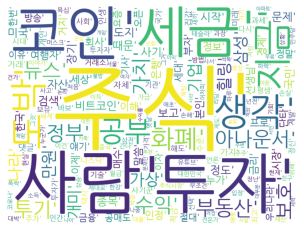

In [54]:
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()